In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import dartwork_mpl

In [4]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'hello')

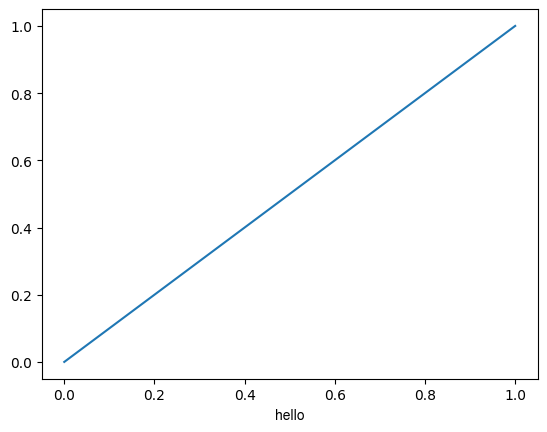

In [5]:
fig, ax = plt.subplots()

ax.plot([0, 1], [0, 1])
ax.set_xlabel('hello', fontdict={'family': 'TeX Gyre Heros'})